# Project: Horse or Human Classification using CNN
We have data for training:

500 horse images
527 human(male & female) images

For validation:

122 horse images
123 human(male & female) images

## Problem Statement:

Classify given image is horse or human(male/female)

### Solution:

To solve this problem we are going to use Deep Learning Algorithm that is CNN (Convolutional Neural Network)

## Dara Scource
Raw Data Scource: https://www.kaggle.com/sanikamal/horses-or-humans-dataset

## Load Libraries

In [ ]:
! pip install tensorflow

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import BatchNormalization
from keras.regularizers import l2


In [ ]:
keras.__version__

'2.7.0'

## Load Data

In [ ]:
train_data_path = "/content/drive/MyDrive/Data_Set/horse-or-human/train"
validation_data_path = "/content/drive/MyDrive/Data_Set/horse-or-human/validation"

# Data Preprocessing

In [ ]:
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

In [ ]:
training_data =  training_datagen.flow_from_directory(train_data_path, 
                                      target_size=(150, 150), 
                                      batch_size=32,
                                      class_mode='binary')

Found 1027 images belonging to 2 classes.


In [ ]:
training_data.class_indices

{'horses': 0, 'humans': 1}

In [ ]:
valid_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
valid_data =  valid_datagen.flow_from_directory(validation_data_path, 
                                      target_size=(150, 150), 
                                      batch_size=32,
                                      class_mode='binary')

Found 256 images belonging to 2 classes.


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

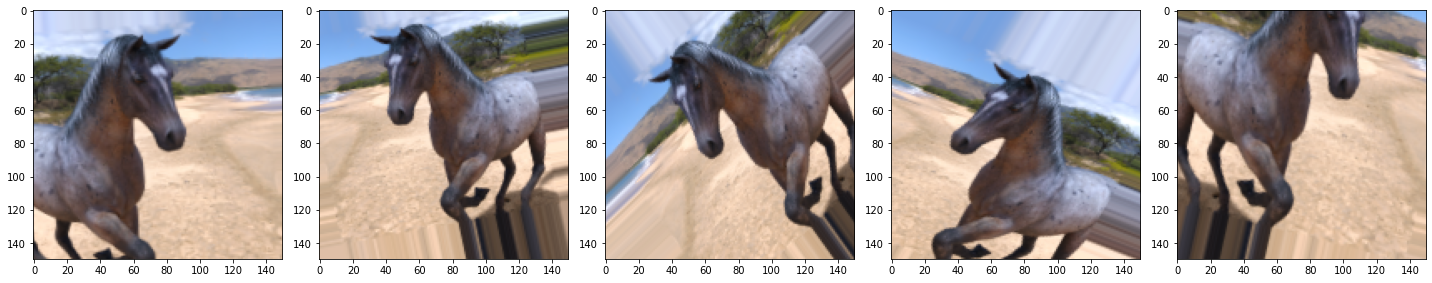

In [ ]:
 images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

#Building cnn model

In [ ]:
#Building cnn model
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=16, kernel_size=7, input_shape=[150, 150, 3],kernel_regularizer=l2(l=0.01)),
                                    BatchNormalization(),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                     
                                    keras.layers.Conv2D(filters=32, kernel_size=5),
                                    BatchNormalization(),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                     
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    BatchNormalization(),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                                                         
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    BatchNormalization(),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                                                     
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    BatchNormalization(),
                                    keras.layers.Dropout(0.5),                                      
                                    keras.layers.Dense(units=256, activation='relu'),  
                                    BatchNormalization(),                                  
                                    keras.layers.Dropout(0.5),                                    
                                    keras.layers.Dense(units=2, activation='softmax') # output layer
])

In [ ]:
# compile cnn model
cnn_model.compile(optimizer = Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# Save the model
model_path = '/content/drive/MyDrive/Saved_Models/horse_or_human_predictor.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
# train cnn model
history = cnn_model.fit(training_data, 
                          epochs=100, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list)

Epoch 1/100
33/33 [==============================] - ETA: 0s - loss: 1.0633 - accuracy: 0.6018
Epoch 00001: val_accuracy improved from -inf to 0.50000, saving model to /content/drive/MyDrive/Saved_Models/horse_or_human_predictor.h5
33/33 [==============================] - 18s 478ms/step - loss: 1.0633 - accuracy: 0.6018 - val_loss: 0.7777 - val_accuracy: 0.5000
Epoch 2/100
33/33 [==============================] - ETA: 0s - loss: 0.9052 - accuracy: 0.6611
Epoch 00002: val_accuracy did not improve from 0.50000
33/33 [==============================] - 15s 452ms/step - loss: 0.9052 - accuracy: 0.6611 - val_loss: 0.8553 - val_accuracy: 0.5000
Epoch 3/100
33/33 [==============================] - ETA: 0s - loss: 0.7753 - accuracy: 0.7001
Epoch 00003: val_accuracy did not improve from 0.50000
33/33 [==============================] - 15s 451ms/step - loss: 0.7753 - accuracy: 0.7001 - val_loss: 0.9553 - val_accuracy: 0.5000
Epoch 4/100
33/33 [==============================] - ETA: 0s - loss: 0.8

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: ignored

# Predict Horse or Human

Here we are loading train CNN model to predict Given input (image) is Horse of Human

# Import Libraries

In [ ]:
 #Load Liraries
import numpy as np

import keras 
from keras.preprocessing.image import ImageDataGenerator

# Import Model

In [ ]:
model_path1 = '/content/drive/MyDrive/Saved_Models/horse_or_human_predictor.h5' #new model.ipynb

model1 = keras.models.load_model(model_path1)


In [ ]:
#Preprocessing 

In [ ]:
#horse image path
h1 = '/content/drive/MyDrive/imges_for_projects/hrd.jpg'
h2 = '/content/drive/MyDrive/imges_for_projects/pexels-photo-635499.jpeg'


#human image path
hu1 = '/content/drive/MyDrive/imges_for_projects/sou.jpg'
hu2 = '/content/drive/MyDrive/imges_for_projects/blue.jpg'
hu3 = '/content/drive/MyDrive/imges_for_projects/sssss.jpg'
hu4 = '/content/drive/MyDrive/imges_for_projects/ddddd.jpg'


In [ ]:
import numpy as np
from keras.preprocessing import image

def pred_human_horse(model, horse_or_human):
  test_image = image.load_img(horse_or_human, target_size = (150, 150))
  test_image = image.img_to_array(test_image)/255
  test_image = np.expand_dims(test_image, axis = 0)

  result = model.predict(test_image).round(3)

  pred = np.argmax(result)
  print(result, "--->>>", pred)

  if pred == 0:
    print('Predicted>>> Horse')
  else:
    print('Predicted>>> Human')

## Predict Output

In [ ]:
for horse_or_human in [h1,h2,hu1,hu2,hu3,hu4]:
  pred_human_horse(model1, horse_or_human)

[[0.599 0.401]] --->>> 0
Predicted>>> Horse
[[0.86 0.14]] --->>> 0
Predicted>>> Horse
[[0.404 0.596]] --->>> 1
Predicted>>> Human
[[0.002 0.998]] --->>> 1
Predicted>>> Human
[[0.001 0.999]] --->>> 1
Predicted>>> Human
[[0.072 0.928]] --->>> 1
Predicted>>> Human
